In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error


In [32]:
# Olivetti yüz verisini yükle
faces = fetch_olivetti_faces()
X = faces.data            # Görseller (400 örnek, her biri 4096 piksel)
y = faces.target          # Hangi kişiye ait olduğunu gösteren etiket (0-39 arası)

print("Veri boyutu:", X.shape)
print("Sınıf sayısı:", len(np.unique(y)))


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ASUS\scikit_learn_data
Veri boyutu: (400, 4096)
Sınıf sayısı: 40


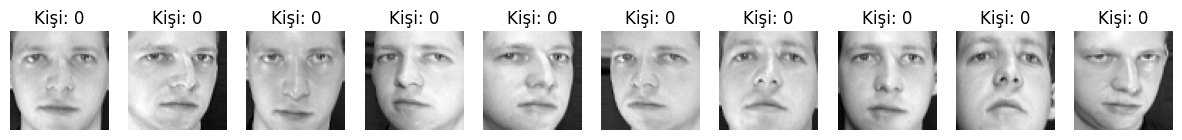

In [33]:
# İlk 10 yüzü görselleştir
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(faces.images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Kişi: {y[i]}")
plt.show()


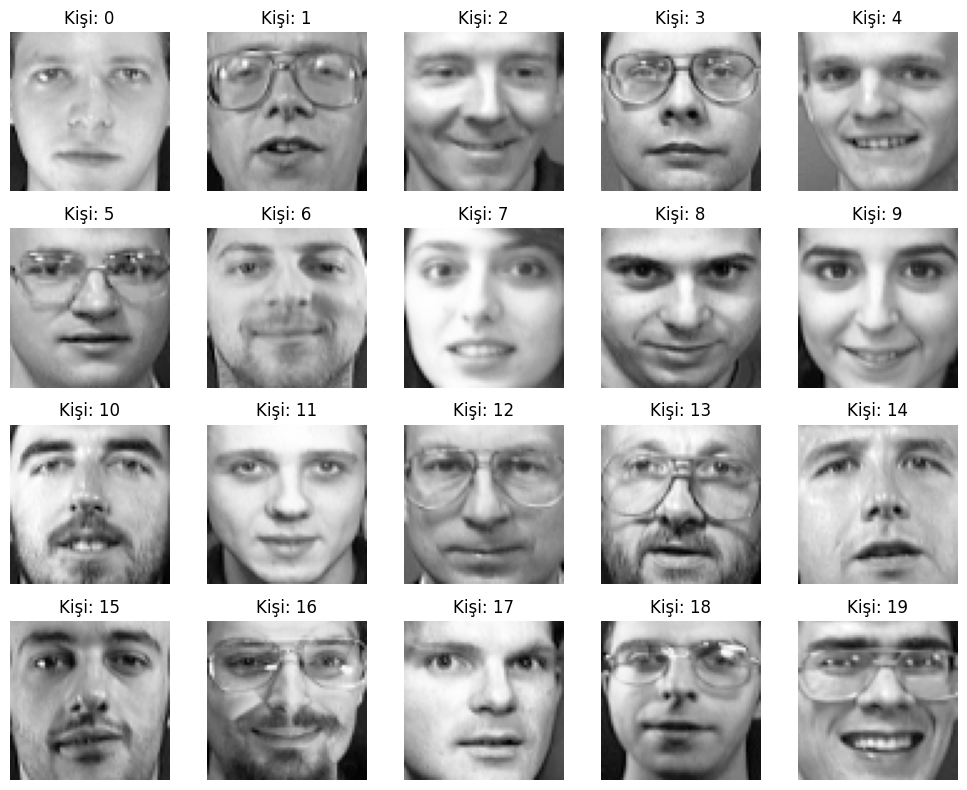

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i * 10], cmap='gray')
    ax.set_title(f"Kişi: {faces.target[i * 10]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


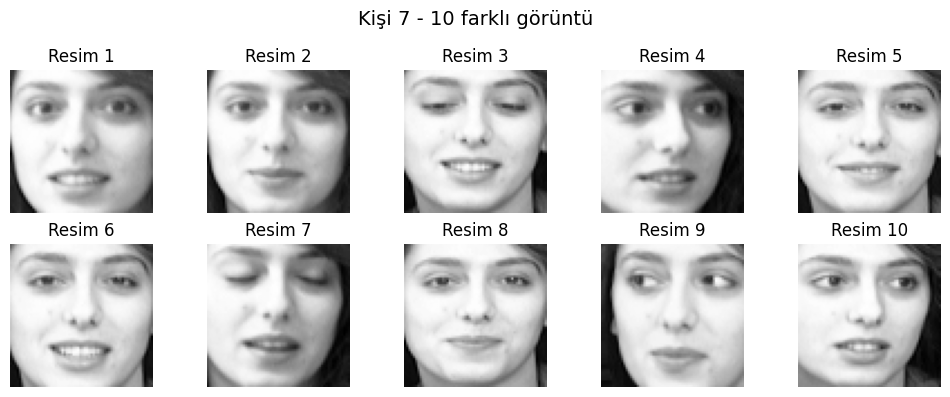

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
person_id = 7
start = person_id * 10

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[start + i], cmap='gray')
    ax.set_title(f"Resim {i+1}")
    ax.axis('off')
plt.suptitle(f"Kişi {person_id} - 10 farklı görüntü", fontsize=14)
plt.tight_layout()
plt.show()


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
# Veriyi ölçeklendir (Zorunlu, çünkü PCA bundan etkilenir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ile boyutu 100'e düşürelim (4096 → 100)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Yeni boyut:", X_train_pca.shape)


Yeni boyut: (320, 100)


In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Tahmin yap
y_pred = model.predict(X_test_pca)

# Metrikler
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Logistic Regression Sonuçları:")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Logistic Regression Sonuçları:
Accuracy (Doğruluk): 0.97
Mean Squared Error: 0.06


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# KNN modelini oluştur ve eğit (örneğin k=5)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca, y_train)

# Tahmin yap
y_pred = knn.predict(X_test_pca)

# Sonuçları hesapla ve yazdır
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)

print("KNN Model Sonuçları:")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error (Hata): {error:.2f}")


KNN Model Sonuçları:
Accuracy (Doğruluk): 0.88
Mean Squared Error (Hata): 63.96


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Decision Tree modelini oluştur - max_depth değeri belirlenmiş
dt = DecisionTreeClassifier(max_depth=100, random_state=42)

# Modeli eğit
dt.fit(X_train_pca, y_train)

# Test verileriyle tahmin yap
y_pred = dt.predict(X_test_pca)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)

# Sonuçları yazdır
print("Decision Tree Model Sonuçları")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error (Hata): {error:.2f}")


Decision Tree Model Sonuçları
Accuracy (Doğruluk): 0.54
Mean Squared Error (Hata): 99.03


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur ve eğit
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Tahmin ve değerlendirme
y_pred = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)

print("Random Forest Model Sonuçları:")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error (Hata): {error:.2f}")


Random Forest Model Sonuçları:
Accuracy (Doğruluk): 0.96
Mean Squared Error (Hata): 11.57


In [45]:
from sklearn.svm import SVC

# Modeli oluştur ve eğit
svm = SVC()
svm.fit(X_train_pca, y_train)

# Tahmin ve değerlendirme
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)

print("SVM Model Sonuçları:")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error (Hata): {error:.2f}")


SVM Model Sonuçları:
Accuracy (Doğruluk): 0.95
Mean Squared Error (Hata): 50.58


In [46]:
from sklearn.naive_bayes import GaussianNB

# Modeli oluştur ve eğit
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# Tahmin ve değerlendirme
y_pred = nb.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
error = mean_squared_error(y_test, y_pred)

print("Naive Bayes Model Sonuçları:")
print(f"Accuracy (Doğruluk): {accuracy:.2f}")
print(f"Mean Squared Error (Hata): {error:.2f}")


Naive Bayes Model Sonuçları:
Accuracy (Doğruluk): 0.84
Mean Squared Error (Hata): 49.88


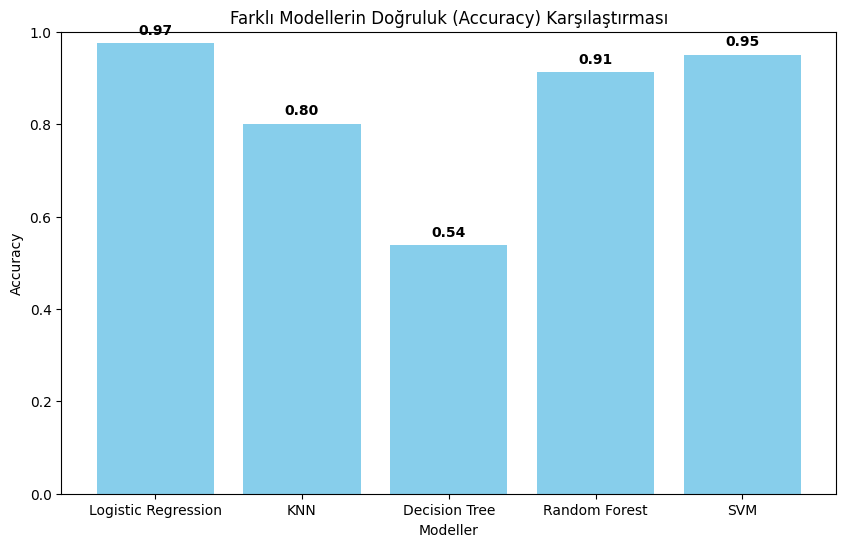

In [68]:
import matplotlib.pyplot as plt

# Model isimleri ve accuracy sonuçlarını saklayacağımız sözlük
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = []

# 1- Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_pca, y_train)
accuracies.append(accuracy_score(y_test, lr.predict(X_test_pca)))

# 2- KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
accuracies.append(accuracy_score(y_test, knn.predict(X_test_pca)))

# 3- Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50, random_state=42)
dt.fit(X_train_pca, y_train)
accuracies.append(accuracy_score(y_test, dt.predict(X_test_pca)))

# 4- Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)
accuracies.append(accuracy_score(y_test, rf.predict(X_test_pca)))

# 5- SVM
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_pca, y_train)
accuracies.append(accuracy_score(y_test, svm.predict(X_test_pca)))

# Grafik çizimi
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim([0,1])
plt.title('Farklı Modellerin Doğruluk (Accuracy) Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
